In [11]:
import numpy as np
import math

In [39]:
def tanh(x):
    return np.tanh(x)
def softmax(x):  #softmax函数传入的是一个列表
    exp=np.exp(x-x.max())  # 这儿可能会有指数爆炸风险，减去一个最大值来避免此问题
#     print(exp)
    return exp/exp.sum()

In [61]:
dimensions=[28*28,10] #设置输入输出维度
activations=[tanh,softmax] #设置两层的不同激活函数
distrubutions=[
    {'b':[0,0]},
    {'b':[0,0],'w':[-math.sqrt(6/dimensions[0]+dimensions[1]),math.sqrt(6/dimensions[0]+dimensions[1])]}
]   # distrubutions定义所需参数的范围
    # 进行初始化 两层网络，一共有三个参数 w的取值是在这个规定范围内最好【经验】

In [39]:
# tanh(0.1)
softmax([1,2,3,4])

[ 2.71828183  7.3890561  20.08553692 54.59815003]


array([0.0320586 , 0.08714432, 0.23688282, 0.64391426])

In [63]:
def init_paramter_b(layer):
    dist=distrubutions[layer]['b']
    return np.random.rand(dimensions[layer])*(dist[1]-dist[0])+dist[0]  
    # 通过random产生随机数，且使其满足distrubution设置的范围
def init_paramter_w(layer):
    dist=distrubutions[layer]['w']
    return np.random.rand(dimensions[layer-1],dimensions[layer])*(dist[1]-dist[0])+dist[0]
def init_paramters():  # 初始化参数
    parameter=[]
    for i in range(len(distrubutions)):  # i表示所在的层数
        layer_parameter={}
        for j in distrubutions[i].keys(): # j表示得到该层的keys列表
            if j=='b':
                layer_parameter['b']=init_paramter_b(i)
                continue
            if j=='w':
                layer_parameter['w']=init_paramter_w(i)
                continue
        parameter.append(layer_parameter)
    return parameter

In [76]:
# init_paramter_w(1).shape
# init_paramter_b(0)
parameters = init_paramters()

In [65]:
def predict(img,parameters):
    # predict 预测函数
    l0_in=img+parameters[0]['b']
    l0_out=activations[0](l0_in)
    l1_in=np.dot(l0_out,parameters[1]['w'])+parameters[1]['b']
    l1_out=activations[1](l1_in)
    return l1_out

In [75]:
predict(np.random.rand(784),parameter).argmax()

[1.59481184e-04 4.11480531e-02 8.07066720e+10 3.97096683e-05
 1.32880533e-04 3.01712998e-10 1.20799139e-02 3.66603887e+14
 3.84309717e+08 6.99546110e-07]


7

In [12]:
from pathlib import Path

In [13]:
dataset_path=Path("./MNIST")
train_img_path=dataset_path/'train-images-idx3-ubyte'/'train-images.idx3-ubyte'
train_lab_path=dataset_path/'train-labels-idx1-ubyte'/'train-labels.idx1-ubyte'
test_img_path=dataset_path/'t10k-images-idx3-ubyte'/'t10k-images.idx3-ubyte'
test_lab_path=dataset_path/'t10k-labels-idx1-ubyte'/'t10k-labels.idx1-ubyte'

In [14]:
train_f=open(train_img_path,'rb')  #读出来的是字节

In [15]:
import struct   #将字节拼接成字

In [16]:
struct.unpack('>4i',train_f.read(16))  #unpack用于读取数据，4i->4个整形字节，读16个

(2051, 60000, 28, 28)

In [17]:
np.fromfile(train_f,dtype=np.uint8).reshape(-1,28*28)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [32]:
train_num=50000
valid_num=10000
test_num=10000

with open(train_img_path,'rb') as f:
    struct.unpack('>4i',f.read(16))
    temp_img=np.fromfile(f,dtype=np.uint8).reshape(-1,28*28)
    train_img=temp_img[:train_num]
    valid_img=temp_img[train_num:]
    
with open(test_img_path,'rb') as f:
    struct.unpack('>4i',f.read(16))
    test_img=np.fromfile(f,dtype=np.uint8).reshape(-1,28*28)
    
with open(train_lab_path,'rb') as f:
    struct.unpack('>2i',f.read(8))
    temp_lab=np.fromfile(f,dtype=np.uint8)
    train_lab=temp_lab[:train_num]
    valid_lab=temp_lab[train_num:]
    
with open(test_lab_path,'rb') as f:
    struct.unpack('>2i',f.read(8))
    test_lab=np.fromfile(f,dtype=np.uint8)

In [19]:
test_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [20]:
train_lab_f=open(train_lab_path,'rb')

In [21]:
struct.unpack('>2i',train_lab_f.read(8))

(2049, 60000)

In [22]:
import matplotlib.pyplot as plt

In [33]:
def show_train_img_label(index):
    img=train_img[index].reshape(28,28)
    plt.imshow(img,cmap='gray')
    print("label:{}".format(train_lab[index]))
    
def show_test_img_label(index):
    img=test_img[index].reshape(28,28)
    plt.imshow(img,cmap='gray')
    print("label:{}".format(test_lab[index]))
        
def show_valid_img_label(index):
    img=valid_img[index].reshape(28,28)
    plt.imshow(img,cmap='gray')
    print("label:{}".format(valid_lab[index]))

label:2


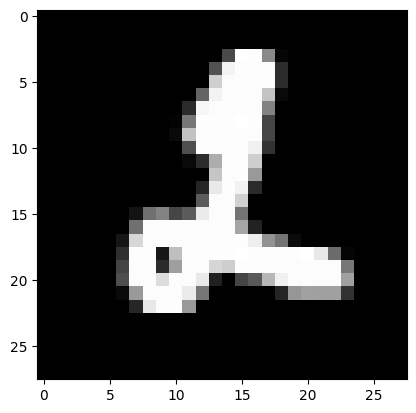

In [34]:
show_train_img_label(np.random.randint(train_num))

label:7


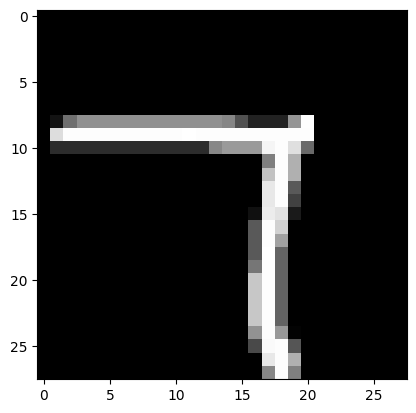

In [35]:
show_test_img_label(np.random.randint(valid_num))

label:6


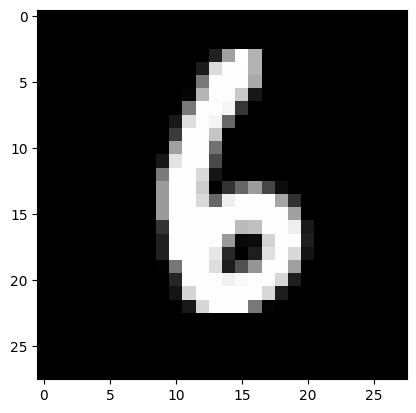

In [36]:
show_valid_img_label(np.random.randint(1000))

In [37]:
img=train_img[0].reshape(28,28)

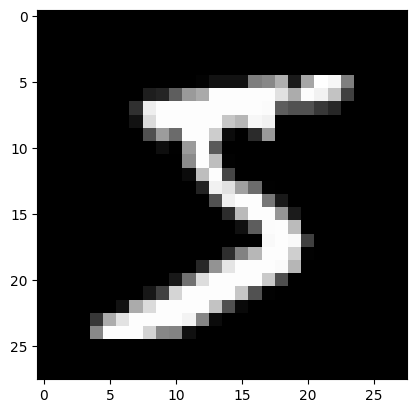

In [38]:
plt.imshow(img,cmap='gray')

In [41]:
# np.diag([1,2,3,4]) # diag：形成一个对角矩阵
np.outer([1,2,3,4],[1,2,3,4]) # outer:对矩阵进行外乘；第一行：1*（1,2,3,4）第二行：2*（1,2,3,4）......

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12],
       [ 4,  8, 12, 16]])

In [42]:
def d_softmax(data):
    sm=softmax(data)
    return np.diag(sm)-np.outer(sm,sm)

In [49]:
def d_tanh(data):
    return np.diag(1/np.cosh(data)**2)

In [50]:
# d_softmax(np.array([1,2,3,4]))
d_tanh([1,2,3,4])

array([[0.41997434, 0.        , 0.        , 0.        ],
       [0.        , 0.07065082, 0.        , 0.        ],
       [0.        , 0.        , 0.00986604, 0.        ],
       [0.        , 0.        , 0.        , 0.00134095]])

In [51]:
differential={softmax:d_softmax,tanh:d_tanh}

In [57]:
# 验证公式(d_softmax,d_tanh)是否正确
h=0.0001
func=softmax
input_len=4
for i in range(input_len):
    test_input=np.random.rand(input_len)
    derivative=differential[func](test_input)
    
    value1=func(test_input)
    test_input[i]+=h
    value2=func(test_input)
#     print((value2-value1)/h)
#     print(derivative[i])
    print(derivative[i]-(value2-value1)/h)

[-4.77397040e-06  1.69741283e-06  1.67342652e-06  1.40313188e-06]
[ 1.90869609e-06 -4.73147027e-06  1.09285982e-06  1.72991242e-06]
[ 1.21086481e-06  2.17659291e-06 -4.71552941e-06  1.32807058e-06]
[ 1.88455083e-06  1.38901928e-06  1.21292223e-06 -4.48649318e-06]


In [60]:
h=0.0001
func=tanh
input_len=4
for i in range(input_len):
    test_input=np.random.rand(input_len)
    derivative=differential[func](test_input)
    
    value1=func(test_input)
    test_input[i]+=h
    value2=func(test_input)
#     print((value2-value1)/h)
#     print(derivative[i])
    print(derivative[i]-(value2-value1)/h)

[[1.44673047 0.         0.         0.        ]
 [0.67722046 0.         0.         0.        ]
 [0.67722046 0.         0.         0.        ]
 [0.67722046 0.         0.         0.        ]]
[[0.         0.62885413 0.         0.        ]
 [0.         1.39506478 0.         0.        ]
 [0.         0.62885413 0.         0.        ]
 [0.         0.62885413 0.         0.        ]]
[[0.         0.         0.78419623 0.        ]
 [0.         0.         0.78419623 0.        ]
 [0.         0.         1.51281564 0.        ]
 [0.         0.         0.78419623 0.        ]]
[[0.         0.         0.         0.93516781]
 [0.         0.         0.         0.93516781]
 [0.         0.         0.         0.93516781]
 [0.         0.         0.         1.41147109]]


In [93]:
onehot=np.identity(dimensions[-1])

def sqr_loss(img,lab,parameters):
    y_pred=predict(img,parameters)[-1]
    y=onehot[lab]
    diff=y-y_pred
    return np.dot(diff,diff)

In [95]:
sqr_loss(train_img[100],train_lab[100],parameters)

0.9999791879276191

In [87]:
def predict(img,parameters):
    # predict 预测函数
    l0_in=img+parameters[0]['b']
    l0_out=activations[0](l0_in)
    l1_in=np.dot(l0_out,parameters[1]['w'])+parameters[1]['b']
    l1_out=activations[1](l1_in)
    return l1_out

In [90]:
predict(train_img[1],parameters)[-1]

array([9.87094618e-05, 8.42218702e-04, 1.26287768e-04, 2.12103733e-05,
       1.65469665e-05, 1.16214769e-05, 2.79184547e-06, 8.38535994e-06,
       2.33373079e-05, 2.02758335e-05])